# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
previsao_renda = pd.read_csv('banco.csv')
previsao_renda = previsao_renda.drop('Unnamed: 0', axis=1)
previsao_renda = previsao_renda.set_index('index')
previsao_renda.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [75]:
previsao_renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 8682 to 12895
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  mau                    15000 non-null  bool   
 13  renda                  15000 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(6)
memory 

In [76]:
previsao = previsao_renda[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']].copy()
previsao.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
index,,,,,
8682,1,36,3.575342,3.0,3369.24
12830,0,42,0.860274,2.0,6096.14
2885,2,31,8.065753,4.0,5658.98
16168,0,50,1.208219,2.0,7246.69
12438,0,52,13.873973,2.0,4017.37


In [77]:
previsao.isna().sum()

qtd_filhos                  0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [78]:
previsao.dropna(inplace=True)

In [79]:
previsao.drop_duplicates(inplace=True)

In [80]:
previsao.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.295312,-0.072918,0.906682,-0.016426
idade,-0.295312,1.000000,0.324236,-0.264427,0.149315
tempo_emprego,-0.072918,0.324236,1.000000,-0.065472,0.397654
qt_pessoas_residencia,0.906682,-0.264427,-0.065472,1.000000,-0.007400
renda,-0.016426,0.149315,0.397654,-0.007400,1.000000


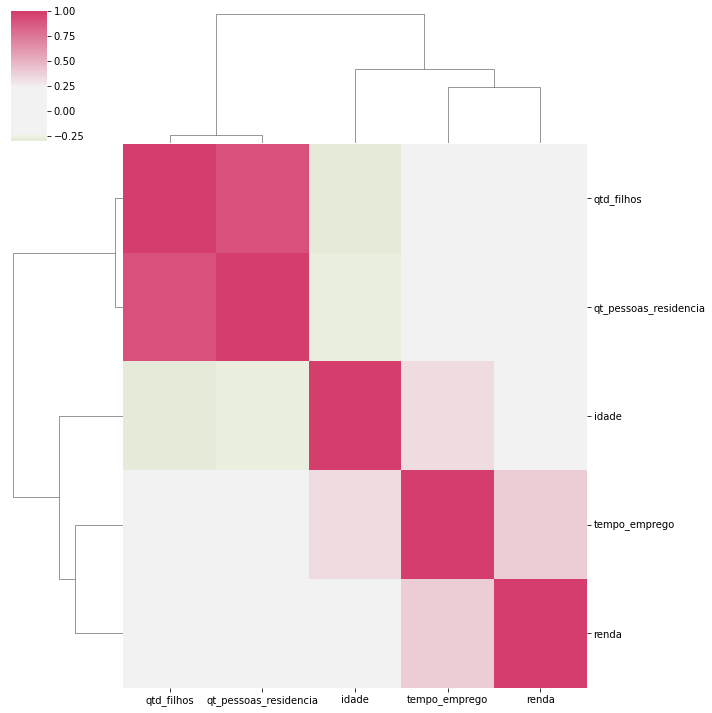

In [81]:
cmap = sns.diverging_palette(h_neg=100, h_pos=359, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(previsao.corr(), figsize=(10, 10), center = 0, cmap=cmap);

- Um padrão é a relação forte e postiva entre quantidades de filhos e quantidade de pessoas na residencia, indicando que a a maioria dos clientes possuem filhos e filhos que ainda moram com eles.
- A quantidade de filhos e idade tem uma relação fraca mas negativa, indicando que os clientes mais novo possuem mais filhos.
- Existe uma correlaçao positiva fraca entre idade e tempo de emprego, demostrando que alguns clientes mais velhos estão a mais tempo no mesmo emprego, dando uma ideia de estabilidade. E uma relação negativa fraca com quantidades de pessoas na residencia.
- O tempo de emprego tem uma correlação positiva fraca com renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

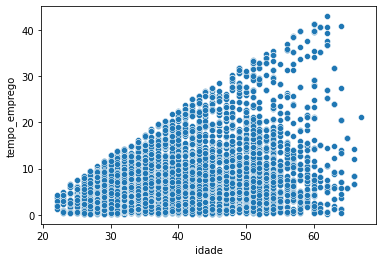

In [82]:
sns.scatterplot(data=previsao, x='idade', y='tempo_emprego');

#### Observa-se uma correlaçao positiva, ou seja, quanto mais idade o cliente tem mais tempo no mesmo emprego ele terá. Mas por outro lado apesar de ser positiva a correlação é fraca, indicando que existem muitos clientes que estão mudando de emprego, por isso possuem tempo de emprego menores, com mais idade.

3) Na sua opinião, há outliers na variável renda?

In [83]:
previsao['renda'].describe()

count     8170.000000
mean      4852.163647
std       4912.707424
min        159.900000
25%       2019.985000
50%       3406.460000
75%       5957.372500
max      89918.040000
Name: renda, dtype: float64

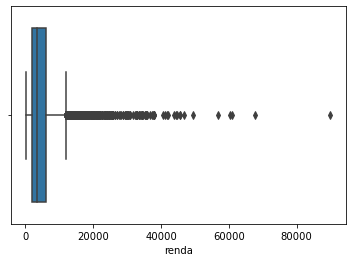

In [84]:
sns.boxplot(x=previsao['renda']);

#### **Pelo boxplot observa-se outliers na variável renda.**

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [85]:
previsao['ln_renda'] = np.log(previsao['renda'])

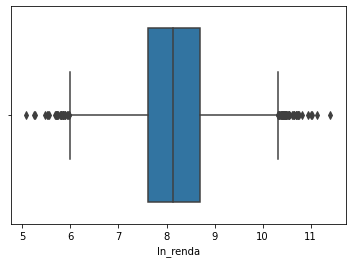

In [86]:
sns.boxplot(x=previsao['ln_renda']);

#### Temos outliers na variável renda, mesmo após a transformação de logaritmo neperiano. 

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

#### **A transformação de log. natural melhorou a visualização da análise.**